The `Substrate Scope Plot` (name undetermined, The creator [@ScienceBey](https://twitter.com/ScienceBey) started a vote for naming this plot) is a really cool visulization to illustrate the substrate scope. [Simon Duerr](https://twitter.com/dr_greg_landrum/status/1207210465509740545) quickly developed the code to generate this beautiful plot. The original code can be found [here](https://github.com/duerrsimon/substrate-scope-plot). Let's try it out!

In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import svgutils.compose as sc
from IPython.display import SVG 
import numpy as np

We first generate the molecular structure from SMILES and save it as a `SVG` file.

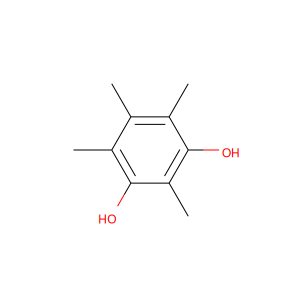

In [4]:
SMILES='C1(=C(C(=C(C(=C1C)C)C)O)C)O'

m = Chem.MolFromSmiles(SMILES)
Draw.MolToFile(m,'rdkit.svg')
SVG('rdkit.svg')

Generate the `panel` and save the plot.

In [5]:
# Label of the atom 
rest_label="R$_1$" ## R1 group


vals = [[80, 10.,10,10,10,10,10 ], # size of the wedges, the first wedge is transparent and will not be shown 
        [ 0,1,99,21,40,50,60], # colormap values for the inner circle, maximum value determines intensity, first is for the transparent wedge and should stay 0
        [0,1,21,40,99,50,60], # colormap values for the outer circle, maximum value determines intensity, first is for the transparent wedge and should stay 0
        [ "","1",">99","21","40","50","60"], #labels for the inner circle
        ["","1","21","40",">99","50","60"], #labels for the outer circle    
        ["","Et","Ph","tBu","NO$_2$","H","Br"], #groups  
       ]

#Start angle of the PIE CHART, play with it
startangle=100


CMAPINNER="Purples"

CMAPOUTER="Greens"

OUTERLABEL="AbcD % conversion"
INNERLABEL="CtfY % conversion"

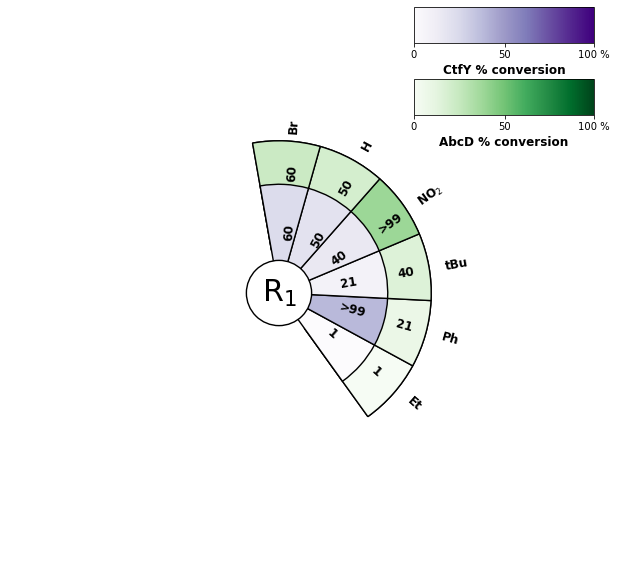

In [6]:
fig, ax = plt.subplots(figsize=(10,10))

ax2cmap1 = plt.axes([0.70, 0.85, 0.25, 0.05])
ax2cmap2 = plt.axes([0.70, 0.75, 0.25, 0.05])
size = 0.5
alpha = 0
which_wedge = 0

circle1 = plt.Circle((0, 0), 0.15, color='w', ls='-', ec='k', lw=1.4)


label = ax.annotate(rest_label, xy=(0, 0), fontsize=30, ha="center", va='center')

cmap_inner = plt.get_cmap(CMAPINNER)
cmap_outer = plt.get_cmap(CMAPOUTER)
outer_colors = cmap_outer(vals[2])
inner_colors = cmap_inner(vals[1])

labels_circle=ax.pie(vals[0], startangle=startangle, radius=0.7, colors=['w']*len(vals[0]), labels=vals[5], rotatelabels=True,labeldistance=1.1,
       wedgeprops=dict(width=size, edgecolor='k',linewidth= 1.4), textprops=dict(fontsize='large', weight="semibold",va='center') )


outer_circle=ax.pie(vals[0], radius=0.7,startangle=startangle, colors=outer_colors, labels=vals[3], rotatelabels=True,labeldistance=0.4,
       wedgeprops=dict(width=size, edgecolor='k',linewidth= 1.4),textprops=dict(fontsize='large',weight="semibold",va='center'))

inner_circle=ax.pie(vals[0], startangle=startangle, radius=1-size, colors=inner_colors, labels=vals[4], rotatelabels=True,labeldistance=1.1,
       wedgeprops=dict(width=size, edgecolor='k',linewidth= 1.4), textprops=dict(fontsize='large', weight="semibold",va='center') )



inner_circle[0][which_wedge].set_alpha(alpha)
outer_circle[0][which_wedge].set_alpha(alpha)
labels_circle[0][which_wedge].set_alpha(alpha)

sm = ScalarMappable(cmap=cmap_inner, norm=plt.Normalize(0,max(vals[1])))
sm.set_array([])
cbar = plt.colorbar(sm,cax=ax2cmap1, orientation="horizontal",ticks=[0,50,99])
cbar.ax.set_xticklabels(['0', '50', '100 %']) 
cbar.set_label(INNERLABEL,weight='bold', fontsize=12)

sm1 = ScalarMappable(cmap=cmap_outer, norm=plt.Normalize(0,max(vals[1])))
sm1.set_array([])
cbar1 = plt.colorbar(sm1,cax=ax2cmap2, orientation="horizontal",ticks=[0,50,99])
cbar1.ax.set_xticklabels(['0', '50', '100 %']) 
cbar1.set_label(OUTERLABEL,weight='bold',fontsize=12)


ax.add_artist(circle1)
ax.set(aspect="equal")
plt.show()

### CHANGE NAME IF YOU NEED A SECOND REST
fig.savefig('R1.svg', transparent=True)

At last, combine the molecular structure with the panel. It needs some tweaks to make these two plots have a good alignment.

In [37]:
sc.Figure("16cm", "16cm", 
    sc.Panel(sc.SVG("rdkit.svg").scale(2).move(0,40)),
    sc.Panel(sc.SVG("R1.svg").scale(0.705).move(110,-30)),
        #sc.Panel(sc.SVG("R2.svg").scale(0.705).move(110,-30)), #add another Panel for a second R
   
    ).save("substrate_scope.svg")
SVG('substrate_scope.svg')

The code works perfectly. 

I'd like to re-oganize the code to make it more customizable.

Issues with current code:

1. In chemistry, people prefer to use superscript to represent the index of the R group. (Easy fix)
2. how to find the suitable start angle of the `panel` 
3. fix the wrong positions of the contents in the `panel` when change the start angle.
4. A better way to align the molecular structure and the panel. Maybe find the coordinates of the R group in the molecular structrure and align the panel to it.
5. For complex R group, how to represent them in the panel.

### Fix the superscript to the index of R group

In [57]:
# Label of the atom 
rest_label="R$^2$" ## R2 group


vals = [[80, 10.,10,10,10,10,10 ], # size of the wedges, the first wedge is transparent and will not be shown 
        [ 0,1,99,21,40,50,60], # colormap values for the inner circle, maximum value determines intensity, first is for the transparent wedge and should stay 0
        [0,1,21,40,99,50,60], # colormap values for the outer circle, maximum value determines intensity, first is for the transparent wedge and should stay 0
        [ "","1",">99","21","40","50","60"], #labels for the inner circle
        ["","1","21","40",">99","50","60"], #labels for the outer circle    
        ["","Et","Ph","tBu","NO$_2$","H","Br"], #groups  
       ]

#Start angle of the PIE CHART, play with it
startangle=10


CMAPINNER="Purples"

CMAPOUTER="Greens"

OUTERLABEL="AbcD % conversion"
INNERLABEL="CtfY % conversion"

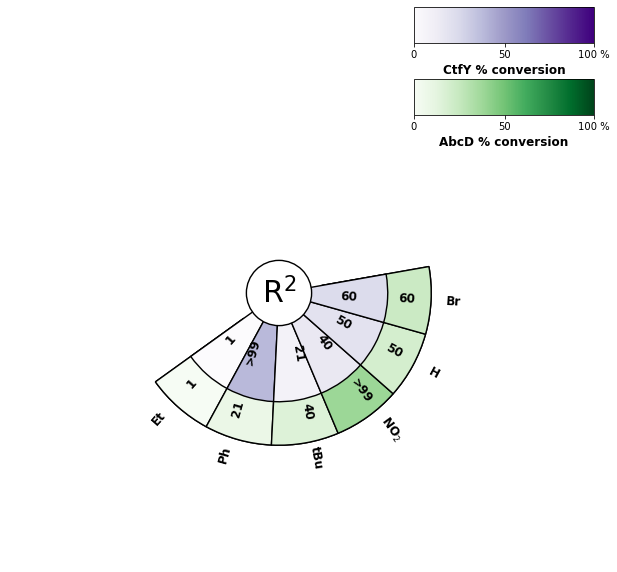

In [58]:
fig, ax = plt.subplots(figsize=(10,10))

ax2cmap1 = plt.axes([0.70, 0.85, 0.25, 0.05])
ax2cmap2 = plt.axes([0.70, 0.75, 0.25, 0.05])
size = 0.5
alpha = 0
which_wedge = 0

circle1 = plt.Circle((0, 0), 0.15, color='w', ls='-', ec='k', lw=1.4)


label = ax.annotate(rest_label, xy=(0, 0), fontsize=30, ha="center", va='center')

cmap_inner = plt.get_cmap(CMAPINNER)
cmap_outer = plt.get_cmap(CMAPOUTER)
outer_colors = cmap_outer(vals[2])
inner_colors = cmap_inner(vals[1])

labels_circle=ax.pie(vals[0], startangle=startangle, radius=0.7, colors=['w']*len(vals[0]), labels=vals[5], rotatelabels=True,labeldistance=1.1,
       wedgeprops=dict(width=size, edgecolor='k',linewidth= 1.4), textprops=dict(fontsize='large', weight="semibold",va='center') )


outer_circle=ax.pie(vals[0], radius=0.7,startangle=startangle, colors=outer_colors, labels=vals[3], rotatelabels=True,labeldistance=0.4,
       wedgeprops=dict(width=size, edgecolor='k',linewidth= 1.4),textprops=dict(fontsize='large',weight="semibold",va='center'))

inner_circle=ax.pie(vals[0], startangle=startangle, radius=1-size, colors=inner_colors, labels=vals[4], rotatelabels=True,labeldistance=1.1,
       wedgeprops=dict(width=size, edgecolor='k',linewidth= 1.4), textprops=dict(fontsize='large', weight="semibold",va='center') )



inner_circle[0][which_wedge].set_alpha(alpha)
outer_circle[0][which_wedge].set_alpha(alpha)
labels_circle[0][which_wedge].set_alpha(alpha)

sm = ScalarMappable(cmap=cmap_inner, norm=plt.Normalize(0,max(vals[1])))
sm.set_array([])
cbar = plt.colorbar(sm,cax=ax2cmap1, orientation="horizontal",ticks=[0,50,99])
cbar.ax.set_xticklabels(['0', '50', '100 %']) 
cbar.set_label(INNERLABEL,weight='bold', fontsize=12)

sm1 = ScalarMappable(cmap=cmap_outer, norm=plt.Normalize(0,max(vals[1])))
sm1.set_array([])
cbar1 = plt.colorbar(sm1,cax=ax2cmap2, orientation="horizontal",ticks=[0,50,99])
cbar1.ax.set_xticklabels(['0', '50', '100 %']) 
cbar1.set_label(OUTERLABEL,weight='bold',fontsize=12)


ax.add_artist(circle1)
ax.set(aspect="equal")
plt.show()

### CHANGE NAME IF YOU NEED A SECOND REST
fig.savefig('R1.svg', transparent=True)

### 

An update tweak from [Greg Landrum](https://twitter.com/dr_greg_landrum/status/1207210465509740545). THe code can be found [here](https://github.com/duerrsimon/substrate-scope-plot/blob/15a7ae299422e9faf92734c5bb9a2eda73568d8d/substrate_scope.ipynb).

In [12]:
import rdkit
rdkit.__version__

'2019.03.1'

In [2]:
import math
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import Geometry
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import svgutils.compose as sc
from IPython.display import SVG # /!\ note the 'SVG' function also in svgutils.compose
import numpy as np

In [3]:
SMILES='C1(=C(C(=C(C(=C1[*:1])C)C)O)C)O'


# Label of the atom 
rest_label="R$^1$"



vals = [[80, 10.,10,10,10,10,10 ], # size of the wedges, the first wedge is transparent and will not be shown 
        [ 0,1,99,21,40,50,60], # colormap values for the inner circle, maximum value determines intensity, first is for the transparent wedge and should stay 0
        [0,1,21,40,99,50,60], # colormap values for the outer circle, maximum value determines intensity, first is for the transparent wedge and should stay 0
        [ "","1",">99","21","40","50","60"], #labels for the inner circle
        ["","1","21","40",">99","50","60"], #labels for the outer circle    
        ["","Et","Ph","tBu","NO$_2$","H","Br"], #groups  
       ]

#Start angle of the PIE CHART, play with it
startangle=100


CMAPINNER="Purples"

CMAPOUTER="Greens"

OUTERLABEL="AbcD % conversion"
INNERLABEL="CtfY % conversion"

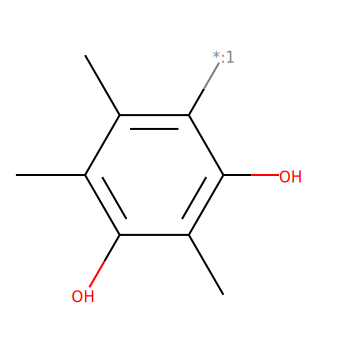

In [4]:
m = Chem.MolFromSmiles(SMILES)
dm = Draw.PrepareMolForDrawing(m)
d2d = Draw.MolDraw2DSVG(350,350)
d2d.DrawMolecule(dm)
d2d.FinishDrawing()
mol_svg = d2d.GetDrawingText()
SVG(mol_svg)

In [8]:
def mol_with_atom_index( mol ):
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).SetProp( 'molAtomMapNumber', str( mol.GetAtomWithIdx( idx ).GetIdx() ) )
    return mol

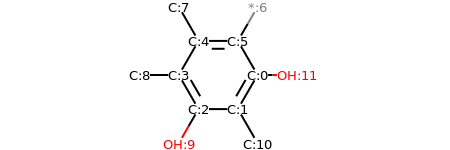

In [9]:
mol_with_atom_index(m)

In [7]:
# in general this is more difficult, but here we know that the R group is atom 6
rIdx = 6
pR = d2d.GetDrawCoords(Geometry.Point2D(dm.GetConformer().GetAtomPosition(rIdx)))
nbr = dm.GetAtomWithIdx(rIdx).GetNeighbors()[0]
pNbr = d2d.GetDrawCoords(Geometry.Point2D(dm.GetConformer().GetAtomPosition(nbr.GetIdx())))
nbrV = pR-pNbr
phi = 180*nbrV.SignedAngleTo(Geometry.Point2D(1,0))/math.pi
print(phi)

ArgumentError: Python argument types in
    Point2D.__init__(Point2D, Point3D)
did not match C++ signature:
    __init__(_object*, double, double)
    __init__(_object*)